In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Create a principal component analysis (PCA) plot for the first two dimensions.
def getPCA(matrix):
    eVal,eVec=np.linalg.eigh(matrix) ### ..eigh(x) -- x is  real symmetric or complex Hermitian (conjugate symmetric) array. 
       ### Returns two objects, a 1-D array eVal =eigenvalues of matrix - eigenvalues with multiplicity, may not be ordered.
       ### and a 2-D square matrix, column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. 
    indices=eVal.argsort() ### Returns the indices that would sort an array. -1 refers to the last axis
    eVal,eVec=eVal[indices],eVec[:,indices]
    eVal=np.diagflat(eVal) ### Create a two-dimensional array with the flattened (changing to 1dim) input eVal as a diagonal.
    return eVal,eVec

In [3]:
x = np.random.normal(0, 1, size=(889,24)) ### first argument mean, second std dev. Random matrix dim in size (T,N)

In [4]:
eVal0,eVec0=getPCA(np.corrcoef(x,rowvar=False))
  ### matrix in getPCA argument is correlation matrix from x. 
  ### If rowvar is True (default), then each row represents a variable, with observations in the columns. 
  ### Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.
  ### np.corrcoef(x,rowvar=False).shape = (24,24); len(eVal0) = 24; eVec0.shape is (24,24)

In [5]:
### main properties of eigenvalues and eigenvectors. use the notation A=V′ΛV to express the decomposition of the matrix A
### where V is the matrix of eigenvectors and Λ=diag(λ1,λ2,…,λp) is the diagonal matrix composed of the ordered eivenvalues, 
### λ1≥λ2≥…λp. Orthogonality: Eigenvectors are always orthogonal, V′V=I. zapsmall() is handy for cleaning up tiny values.

In [6]:
eigenvalues=np.diagonal(eVal0)

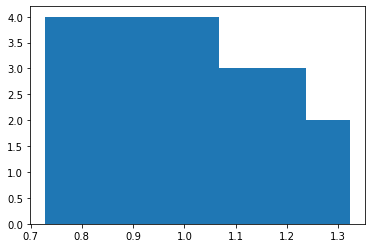

In [7]:
import matplotlib.pyplot as plt

plt.hist(eigenvalues, bins = 7)
plt.show()
### This empirical pdf not close to the theoretical pdf since N, T are small

In [8]:
from sklearn.neighbors import KernelDensity
def fitKDE(obs,bWidth=.25,kernel='gaussian',x=None):
    if len(obs.shape)==1: obs=obs.reshape(-1,1)
    kde=KernelDensity(kernel=kernel,bandwidth=bWidth).fit(obs)
    if x is None:x=np.unique(obs).reshape(-1,1)    
    if len(x.shape)==1: x=x.reshape(-1,1)
    logProb=kde.score_samples(x)
    pdf=pd.Series(np.exp(logProb),index=x.flatten())
    return pdf

In [9]:
pdf1=fitKDE(eigenvalues,bWidth=.05) ### bandwidth is increased to smoothen the pdf curve

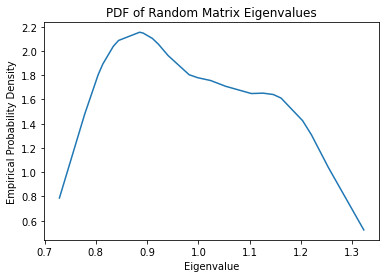

In [10]:
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.lineplot(x=eigenvalues, y=pdf1, ax=ax) ### prints empirical pdf
ax.set_title('PDF of Random Matrix Eigenvalues')
ax.set_xlabel('Eigenvalue')
ax.set_ylabel('Empirical Probability Density')
plt.show()